# Chapter 14 - The kNN Model

## Listing 14-1. Import the traffic data

In [1]:
import pandas as pd
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


## Listing 14-2. Feature engineering to create the additional explanatOry variables

In [2]:
data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)


## Listing 14-3. Creating the train test split and computing the R2 of the default model

In [3]:
import mlflow
mlflow.autolog()

# Create objects X and y
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)

from sklearn.neighbors import KNeighborsRegressor
my_dt = KNeighborsRegressor()
my_dt.fit(X_train, y_train)

fcst = my_dt.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(fcst)))


2025/05/27 13:25:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/27 13:25:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0361e49e5e964ec982ce0d954cb6003f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 13:25:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as d

0.9706400665335333


## Listing 14-4. Creating a plot on the data of the test set

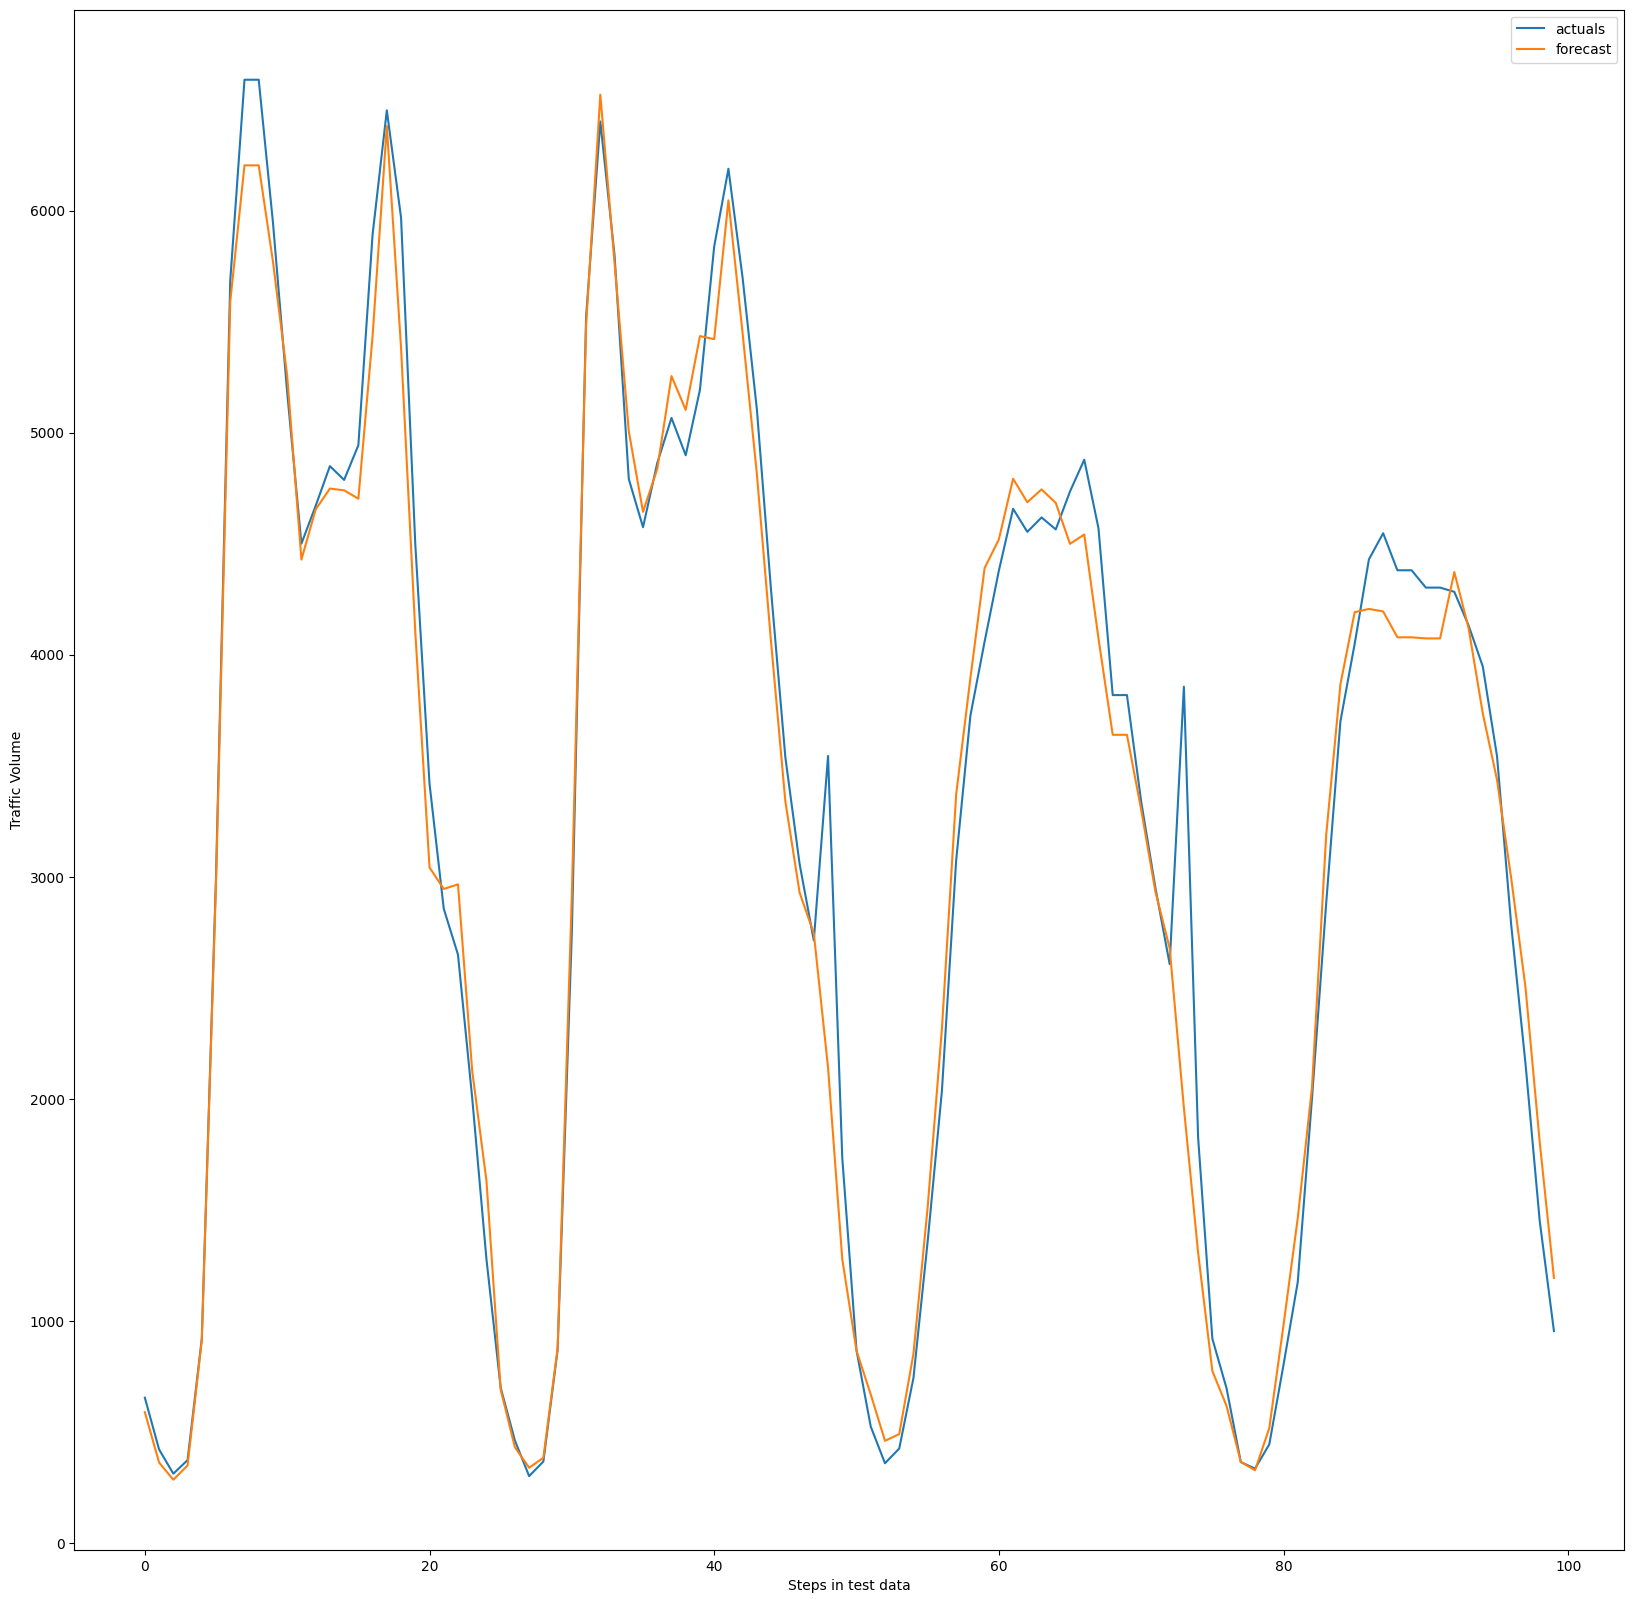

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(list(y_test))
plt.plot(list(fcst))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()


## Listing 14-5. Adding a grid search cross-validation to the knn model

In [5]:
from sklearn.model_selection import GridSearchCV

my_knn = GridSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':[2, 4, 6, 8, 10, 12]},
                scoring = 'r2', n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)


2025/05/27 13:26:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2851e438529b49969059ac3042cdc738', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 13:26:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Mi

0.9724742461838174
KNeighborsRegressor(n_neighbors=8)


## Listing 14-6. Adding a random search cross-validation to the knn model

In [6]:
from sklearn.model_selection import RandomizedSearchCV

my_knn = RandomizedSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':list(range(1, 20))},
                scoring = 'r2', n_iter=10, n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)


2025/05/27 13:28:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9d0906ee9afc499f98b96b3264281c36', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 13:28:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Mi

0.9746546739228016
KNeighborsRegressor(n_neighbors=9)
